In [2]:
import pandas as pd
import numpy as np
import plotly.express as px


Pull the statistics for each position from pro football reference

In [3]:
rec_url = 'https://www.pro-football-reference.com/years/2022/receiving.htm'
wr_df = pd.read_html(rec_url)[0]

rush_url = 'https://www.pro-football-reference.com/years/2022/rushing.htm'
rb_df = pd.read_html(rush_url, header=1)[0]

qb_url = 'https://www.pro-football-reference.com/years/2022/passing.htm'
qb_df = pd.read_html(qb_url)[0]

In [4]:
wr_df.drop(['Ctch%', '1D', 'Lng', 'Fmb', 'Rk'], axis=1, inplace = True) 
wr_df.drop(wr_df[wr_df['Rec'] == 'Rec'].index, inplace = True) #drop columns and rows that we do not want to keep

In [5]:
wr_df[['Age', 'G', 'GS', 'Tgt', 'Rec', 'Yds', 'Y/R', 'TD', 'Y/Tgt', 'R/G', 'Y/G']] = wr_df[['Age', 'G', 'GS', 'Tgt', 'Rec', 'Yds', 'Y/R', 'TD', 'Y/Tgt', 'R/G', 'Y/G']].apply(pd.to_numeric) #change datatypes to numeric


In [6]:
wr_df.query('Pos == "WR"', inplace=True) #make a dataframe for only recievers
wr_df.query('Rec >= 10', inplace=True) #only inlcude players with 10 or more catches
wr_df.query('`R/G` >= 2', inplace=True) #only include players with 2 or more catches per game

In [7]:
wr_df.sort_values(by=['Y/R'], ascending=False, inplace=True)

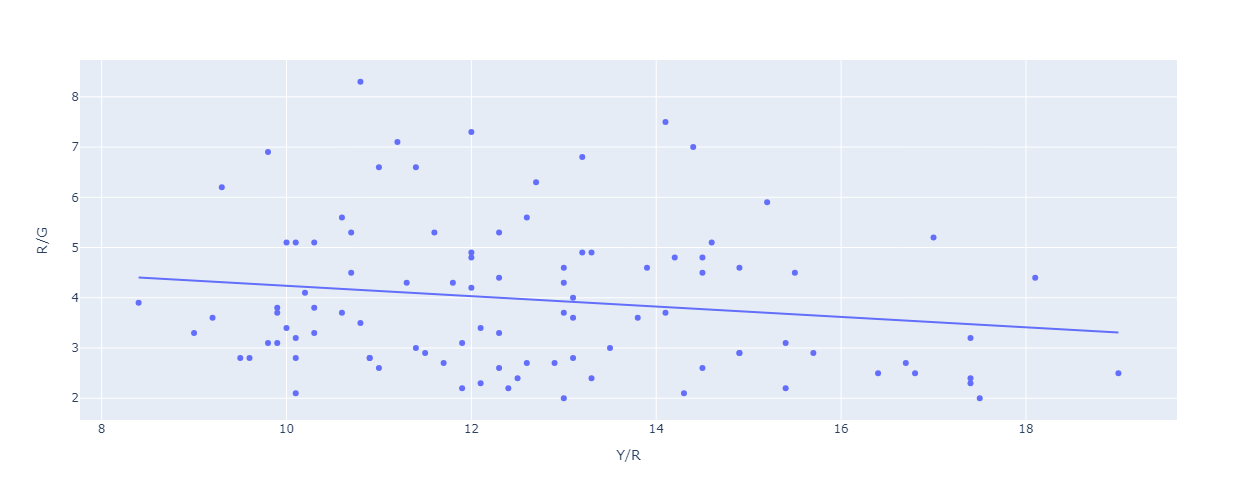

In [8]:
fig = px.scatter(wr_df, x="Y/R", y="R/G", trendline='ols', hover_data=['Player'], height= 500, width=1333)
fig.show() #show scatter plot detailing performance of wide receivers

In [9]:
rb_df.drop(rb_df[rb_df['Age'] == 'Age'].index, inplace = True)
rb_df[['Age', 'G', 'GS', 'Att', 'Yds', 'TD', 'Lng', 'Y/A', 'Y/G', 'Fmb']] = rb_df[['Age', 'G', 'GS', 'Att', 'Yds', 'TD', 'Lng', 'Y/A', 'Y/G', 'Fmb']].apply(pd.to_numeric) #drop rb columns we do not want and change the ones we need to numeric


In [10]:
rb_df.query('Pos == "RB"', inplace=True) #make a dataframe for only RBs
rb_df.query('Att >= 50', inplace=True) #only inlcude players with 50 or more rushes

rb_df.sort_values(by=['Y/G'], ascending=False, inplace=True)

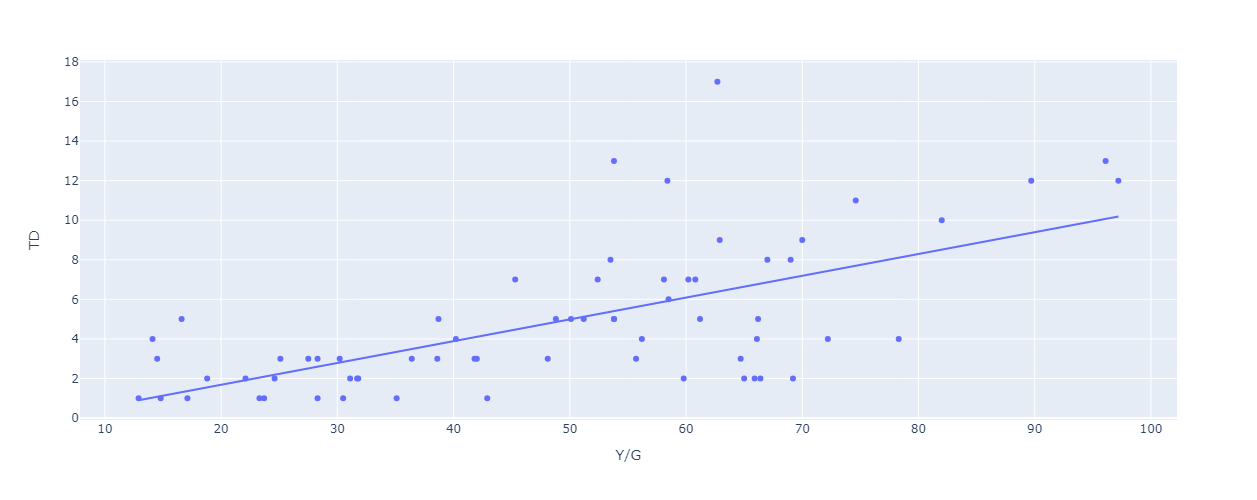

In [11]:
fig = px.scatter(rb_df, x="Y/G", y="TD", trendline='ols', hover_data=['Player'], height= 500, width=1333)
fig.show() #show scatter plot detailing performance of running backs

In [12]:
qb_df.drop(columns=['1D', '4QC', 'ANY/A', 'NY/A', 'Sk', 'Lng', 'Rk', 'GWD', 'Yds.1'], inplace=True)
qb_df.drop(qb_df[qb_df['Age'] == 'Age'].index, inplace = True) #drop qb columns we do not want

In [13]:
qb_df[['Age', 'G', 'GS', 'Att', 'Cmp', 'Yds', 'TD', 'Y/A', 'Y/G']] = qb_df[['Age', 'G', 'GS', 'Att', 'Cmp', 'Yds', 'TD', 'Y/A', 'Y/G']].apply(pd.to_numeric) #change to numeric
qb_df.query('Pos == "QB"', inplace=True) #only include QBs
qb_df.query('Att >= 100', inplace=True) #min of 100 attempts
qb_df['TD/G'] = qb_df['TD'] / qb_df['G'] #create a column for TD/G
qb_df.sort_values(by=['Y/G'], ascending=False, inplace=True)

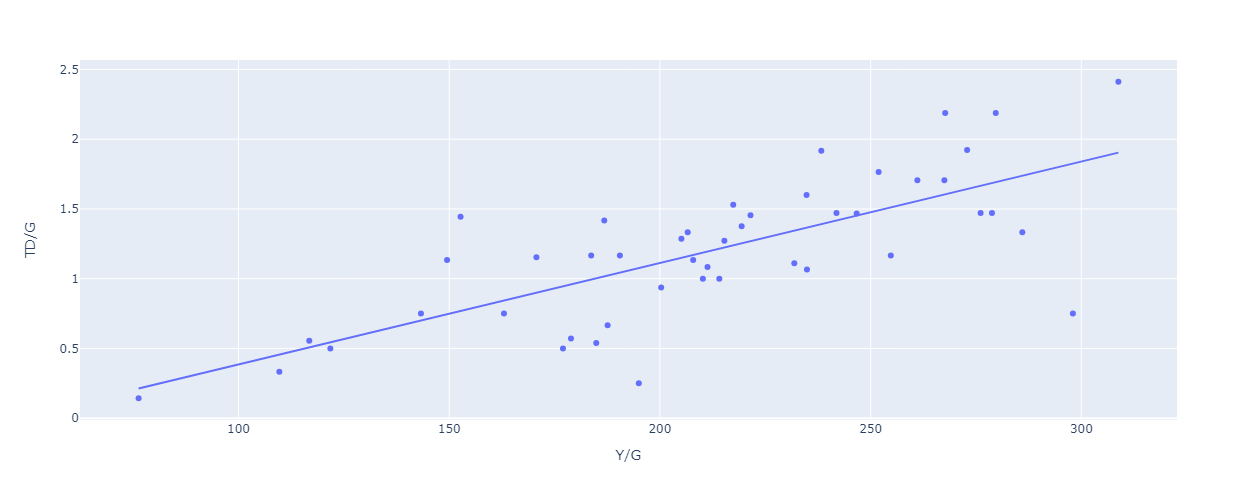

In [14]:
fig = px.scatter(qb_df, x="Y/G", y="TD/G", trendline='ols', hover_data=['Player'], height= 500, width=1333)
fig.show() #show scatter plot detailing QB performance